# __Casos de uso__
<font color='red' size=5>Grupo 8.</font>

<font color='red'>Módulo: Fundamentos de Python</font>

<font color='red'>__ATENCIÓN:__:<br>
Indicamos los caso de uso con el nombre del alumno.</font>

# <font color='blue'>**Caso de uso: Alejandro Heredia**</font>

## ***Análisis de Datos de Rendimiento de Semillas***
En la industria del desarrollo de semillas, es fundamental analizar el rendimiento de diferentes variedades de semillas en diversas condiciones climáticas y de suelo.
Para realizarlo, en primera instancia se necesita compilar y analizar datos sobre el rendimiento de varias variedades de semillas en diferentes parcelas. Los datos incluyen variables como la `variedad de semilla`, la cantidad de agua utilizada, el `tipo de suelo`, y el rendimiento final (en `toneladas por hectárea`). La tarea consiste en **identificar qué variedad tiene el mejor rendimiento bajo condiciones específicas.**

Para abordar este problema, se podría utilizar Python para procesar y analizar los datos. A continuación se presenta un breve pseudocódigo que describe cómo se podría implementar esta solución utilizando fundamentos básicos de Python vistos en el presente módulo.





```
# Partimos
variedades = ["Variedad A", "Variedad B", "Variedad C"]
rendimientos = []  # Lista para almacenar los rendimientos

# Función para calcular el rendimiento promedio
def calcular_rendimiento_promedio(rendimientos):
    total = 0
    for rendimiento in rendimientos:
        total += rendimiento
    promedio = total / len(rendimientos)
    return promedio

# Bucle para recopilar datos
for variedad in variedades:
    print(f"Ingrese el rendimiento para {variedad} (en toneladas por hectárea):")
    rendimiento = float(input())  # Entrada del usuario
    rendimientos.append(rendimiento)

# Llamada a la función para calcular el rendimiento promedio
promedio_rendimiento = calcular_rendimiento_promedio(rendimientos)

# Determinación de la mejor variedad
mejor_variedad = variedades[rendimientos.index(max(rendimientos))]

# Salida de resultados
print(f"El rendimiento promedio es: {promedio_rendimiento} toneladas por hectárea.")
print(f"La mejor variedad es: {mejor_variedad} con un rendimiento de {max(rendimientos)} toneladas por hectárea.")
```






Este código simplifica una serie de cálculos obtenidos de la entrada directa del usuario para entregar la variedad con el mejor rendimiento.

Es posible tambien obtener los rendimientos a partir de un archivo de texto, como lo aprendimos en este módulo.

La obtención de las variables de variedad y rendimientos a partir de un archivo de texto podría obtenerse creando una función específica que lea datos a partir de un archivo de texto y lo transforma en 2 listas. Podría ser asi:


```
# Leer datos desde un archivo de texto
def leer_datos_desde_archivo(nombre_archivo):
    with open(nombre_archivo, 'r') as archivo:
        for linea in archivo:
            # Separar la línea en variedad y rendimiento
            datos = linea.strip().split(',')
            variedad = datos[0].strip()
            rendimiento = float(datos[1].strip())
            variedades.append(variedad)
            rendimientos.append(rendimiento)

# Nombre del archivo que contiene los datos
nombre_archivo = 'rendimientos_semanales.txt'

# Llamada a la función para leer los datos
leer_datos_desde_archivo(nombre_archivo)
```



Con este script podemos escalar tremandamente el análisis y la obtención de respuestas a problemáticas reales de la industria del desarrollo de semillas donde trabajo actualmente, lo cual es una potencial solucion que tiene un impacto y valor percibido por la empresa.

# <font color='blue'>**Caso de uso: Fernanda Jahn**</font>
## ***Control de la aireación en los reactores biológicos de una PTAS***


En las Plantas de Tratamiento de Aguas Servidas (PTASs), el proceso de aireación es crítico para el tratamiento biológico que ocurre en los reactores aireados. Esto se debe a que las reacciones biológicas que llevan a cabo las bacterias en los lodos activados de los reactores depende de las condiciones aeróbicas o anóxicas en que se encuentren.


Los operadores en una planta de la Región de Araucanía actualmente controlan los ciclos de aireación de los reactores biológicos de manera manual, siguiendo un horario específico que indica cuándo apagar (OFF) los sopladores para detener la inyección de aire en ciertos momentos del día.

Las horas de revisión para decidir si realizar el OFF de sopladores son las siguientes:

- 02:30
- 03:00
- 05:30
- 06:15
- 09:00
- 09:45
- 12:00
- 12:45
- 22:30
- 23:00.

Se sigue la siguiente regla de operación:

*  Se apagan los sopladores si la concentración de oxígeno disuelto es mayor a 4.0 mg/L.
*  No se apagan si la concentración de oxígeno disuelto es menor a 4.0 mg/L.

**Objetivo de Automatización**

Queremos automatizar este proceso para evitar que los operadores tengan que recopilar y analizar datos manualmente. Esta solución incluye instalar sensores en línea de oxígeno disuelto, que tomarán mediciones de manera continua.

La idea es que estos sensores generen datos en línea, por ejemplo, cada 1 minuto, y que podamos calcular un promedio de los últimos 5 minutos para determinar el camino de la regla de operación. Para asegurarnos de que los datos sean representativos, haremos un filtrado básico:


*   Eliminar outliers que estén bajo el percentil 5% y sobre el percentil 95%.
*   Calcular el promedio de oxígeno disuelto después de este filtrado.
*   Comparar este promedio con el valor de referencia (4.0 mg/L):
    - Si el promedio supera 4.0 mg/L se apaga el soplador.
    -  Si el promedio es menor o igual a 4.0 mg/L no se apaga el soplador.

### <font color='blue'> 1. Código de la Solución

In [ ]:
## Importamos las bibliotecas necesarias
from datetime import datetime, timedelta  # Para manejar fechas y horas
import numpy as np                        # Para calcular percentiles y procesar datos numéricos
import random                             # Para generar valores aleatorios

## Definición de variables de control
set_point = 4.0           # Valor de oxígeno disuelto para decidir apagar los sopladores (mg/L)
intervalo_med = 5         # Intervalo de medición (min)
periodo = 30              # Periodo de tiempo para calcular promedio (min)
percentil_inf = 5         # limite inferior de percentil para eliminar outliers
percentil_sup = 95        # limite superior de percentil para eliminar outliers
horas_revision = ["02:30", "03:00", "05:30", "06:15","09:00", "09:45", "12:00",
                  "12:45", "22:30", "23:00"]

## Definición de funciones
# Función para eliminar outliers
def eliminar_outliers(data, percentil_inf, percentil_sup):
    limite_inferior = np.percentile(data, percentil_inf)
    limite_superior = np.percentile(data, percentil_sup)
    data_filt = [x for x in data if limite_inferior <= x <= limite_superior]
    return data_filt

# Función para calcular el promedio filtrado
def promedio_filtrado(data):
    data_filt = eliminar_outliers(data, percentil_inf, percentil_sup)
    return sum(data_filt)/len(data_filt)

# Funciones para las acciones de control
def apagar_soplador():
    print("Soplador apagado")

def mantener_encendido_soplador():
    print("Soplador encendido")

# Función para revisar el OD y controlar los sopladores
def control_sopladores(data, hora_actual):

    hora_actual_str = hora_actual.strftime("%H:%M")

    # Verificar si estamos en una hora de revisión
    if hora_actual_str in horas_revision:
        print(f"Hora de revision: {hora_actual_str}")

        # Tomar los últimos 6 datos (equivalente a los últimos 5 min contando el min 0)
        data_5min = data[-6:]

        # Calcular el promedio outliers filtrados
        promedio = promedio_filtrado (data_5min)

        # Determinar si el soplador debe apagarse
        if promedio > set_point:
            apagar_soplador()
        else:
            mantener_encendido_soplador()
    else:
        print(f"No es hora de revision. Son las : {hora_actual_str}")

# Llamada al controlador en un ciclo
## Digamos que tenemos estas mediciones de OD del sensor
data_sensor = [4.1, 4.3, 4.7, 4.6, 3.9, 4.5, 4.8, 4.0, 4.2, 4.6, 0, 4.4] # El cero fue por un error de medición del sensor
# Revisamos nuestro reloj para ver que hora es
hora_actual = datetime.now()
control_sopladores(data_sensor,hora_actual)


No es hora de revision. Son las : 02:25


### <font color='blue'> 2. Simulación de lógica de control en un día completo

In [ ]:
# Simulamos en un día completo en vez de en la hora actual
def simulacion():
    # Hora inicial de la simulación
    hora_actual = datetime.strptime("00:00", "%H:%M")

    # Simulación durante un día completo (1440 minutos = 24 horas)
    for i in range(1440):
        # Generar un valor de OD aleatorio entre 3 y 5
        valor_OD = round(random.uniform(3, 5), 2)
        data_sensor.append(valor_OD)

        # Ejecutar el control de sopladores
        control_sopladores(data_sensor, hora_actual)

        # Avanzar un minuto
        hora_actual += timedelta(minutes=1)

## Digamos que estas son las últimas mediciones del día de ayer
data_sensor = [4.1, 4.3, 4.7, 4.6, 3.9, 4.5, 4.8, 4.0, 4.2, 4.6, 0, 4.4]
simulacion()

No es hora de revision. Son las : 00:00
No es hora de revision. Son las : 00:01
No es hora de revision. Son las : 00:02
No es hora de revision. Son las : 00:03
No es hora de revision. Son las : 00:04
No es hora de revision. Son las : 00:05
No es hora de revision. Son las : 00:06
No es hora de revision. Son las : 00:07
No es hora de revision. Son las : 00:08
No es hora de revision. Son las : 00:09
No es hora de revision. Son las : 00:10
No es hora de revision. Son las : 00:11
No es hora de revision. Son las : 00:12
No es hora de revision. Son las : 00:13
No es hora de revision. Son las : 00:14
No es hora de revision. Son las : 00:15
No es hora de revision. Son las : 00:16
No es hora de revision. Son las : 00:17
No es hora de revision. Son las : 00:18
No es hora de revision. Son las : 00:19
No es hora de revision. Son las : 00:20
No es hora de revision. Son las : 00:21
No es hora de revision. Son las : 00:22
No es hora de revision. Son las : 00:23
No es hora de revision. Son las : 00:24


Esta lógica se podría aplicar en un sistema de control simple que revisa en determinados tiempos si se cumple un set-point para llevar a cabo una acción. Esta solución generaría los mismos resultados de los realizado manualmente hoy en día por los operadores, liberándolos para otras tareas.

Por como está hecho el código, cada minuto habría que revisar si estamos en una hora de revisión. Una mejora que se podría hacer es que solo se active el código a ciertas horas, sin tener que correrlo.

Además, en un proceso biológico real cuando el reactor está apagado el oxígeno se consume. Sería interesante simular este consumo de oxígeno cuando se cumpla la condición de que los sopladores estén apagados, en vez de agregar valores aleatorios de oxígeno. De forma paralela, cuando los sopladores están prendidos el oxígeno disuelto aumenta, hasta llegar a un límite en que el líquido se encuentra saturado. Ambos comportamientos se podrían asociar a una función de una curva para definir el aumento o disminución de OD.

# <font color='blue'>**Caso de uso: Gonzalo Barria**</font>
## ***Análisis y reporte de desempeño académico y otros indicadores***

El Instituto Profesional AIEP es una institución de educación superior con 58 años de experiencia formando profesionales y técnicos de nivel superior para el desarrollo de Chile. Algunas de sus características son que tiene 150.008 metros cuadrados de instalaciones para estudiantes, 96 carreras profesionales y técnicas presenciales y a distancia, 7 Escuelas en distintas áreas del conocimiento, 4.551 docentes insertos en el medio laboral y un 91% empleabilidad promedio de sus titulados.

En su administración como Instituto Profesional AIEP presenta varios desafíos y dado mi rol como ingeniero de estudios en AIEP, podría desarrollar un caso de uso para automatizar análisis de datos académicos y otros indicadores usando Python.

AIEP, como institución educativa, maneja datos de estudiantes como notas, asistencia, deserción y rendimiento en distintas asignaturas. Procesar esta información de manera manual o utilizando otros software que no sean de codigo abierto puede ser tedioso y propenso a errores. Mientras que tener una solución automatizada para analizar y reportar estos datos es útil para tomar decisiones informadas.

**Como solución propongo desarrollar un script en Python que:**

Procese datos de rendimiento académico de los estudiantes desde archivos como Excel o CSV y genere análisis de rendimiento por carrera, sede o año. A la vez se puede identificar patrones de desempeño, como estudiantes con bajo rendimiento o alta probabilidad de deserción.

**Funciones que se podrían implementar:**

*Carga de Datos:* Usar pandas para leer archivos de datos.

*Análisis Exploratorio:* Utilizar estructuras como listas, diccionarios y sets para filtrar datos y calcular estadísticas como promedios y medianas por curso, carrera o sede.

*Identificación del riesgo de Deserción:* Usar estructuras condicionales y bucles para identificar estudiantes con bajo rendimiento, usando promedio y asistencia

*Reportes Automatizados:* Generar reportes o gráficos básicos, como tendencias de notas por curso, usando módulos como matplotlib.

*Manejo de Errores:* Incluir manejo de excepciones para asegurar que el programa pueda gestionar datos incompletos o errores en el formato de los archivos.



<font color='red'>__ATENCIÓN__: En este caso se utiliza código en python, pero solo como referencia, no es ejecutable en este notebook (produciría un error).</font>
### **Segunda etapa (Desarrollo de código en Python)**

Como primer ejemplo tenemos el siguiente código que facilita el análisis de un archivo de rendimiento académico al calcular promedios por carrera y graficar la distribución de notas.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def cargar_datos(filepath):
    try:
        datos = pd.read_csv(filepath)
        return datos
    except FileNotFoundError:
        print("Error: Archivo no encontrado.")
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
    return None

def calcular_promedio_por_carrera(datos):
    promedios = {}
    for carrera, grupo in datos.groupby("Carrera"):
        promedio = grupo["Nota"].mean()
        promedios[carrera] = promedio
    return promedios

def generar_reporte(datos):
    # Ejemplo de código para generar un gráfico
    datos['Nota'].plot(kind='hist', bins=10, title="Distribución de Notas")
    plt.show()

# Ejecución
datos = cargar_datos("rendimiento_academico.csv")
if datos is not None:
    promedios = calcular_promedio_por_carrera(datos)
    print("Promedios por Carrera:", promedios)
    generar_reporte(datos)

**Codigo para encontrar riesgos de deserción**

Esta función permite monitorear el riesgo de deserción en función del rendimiento académico y la asistencia.

In [ ]:
def identificar_riesgo_desercion(datos):
    # Lista para guardar los estudiantes en riesgo de deserción
    estudiantes_en_riesgo = []

    # Iteramos por cada fila en el DataFrame
    for index, row in datos.iterrows():
        promedio_nota = row["Nota"]
        asistencia = row["Asistencia"]

        # Condición de riesgo de deserción: nota promedio < 4 y asistencia < 70%
        if promedio_nota < 4.0 and asistencia < 70:
            estudiantes_en_riesgo.append(row["Estudiante"])  # Guarda la identificación del estudiante

    if estudiantes_en_riesgo:
        print("Estudiantes en riesgo de deserción:", estudiantes_en_riesgo)
    else:
        print("No hay estudiantes en riesgo de deserción.")

# Ejecución
datos = cargar_datos("rendimiento_academico.csv")
if datos is not None:
    promedios = calcular_promedio_por_carrera(datos)
    print("Promedios por Carrera:", promedios)
    generar_reporte(datos)
    identificar_riesgo_desercion(datos)

**Impacto para AIEP:**

Estos análisis permitirían a la institución anticipar problemas académicos, adaptar estrategias de enseñanza y ofrecer soporte adicional a los estudiantes en riesgo. Además, al automatizar el proceso, se ahorra tiempo y se reduce la posibilidad de errores.

# <font color='blue'>**Caso de uso: Rodrigo Fuenzalida**</font>
## ***API de geocoding para obtención de datos georeferenciados***




Esta es una API que desarrollé para el futuro sitio comunidad.vallenar.cl. El sitio está desarrollado en Laravel(PHP), desde el cual se realizan llamadas AJAX a un servidor API REST desarrollado en Django Ninja (Python).

Uno de los endpoints utiliza esta función. Aquí podemos ver el comienzo de la definición de la función.

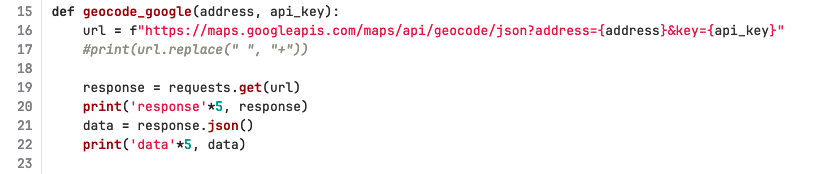

Esta función genera un url para realizar una llamada a la API de geocoding de Google Maps, y luego asigna variables a distintos elementos del JSON obtenido en el response.

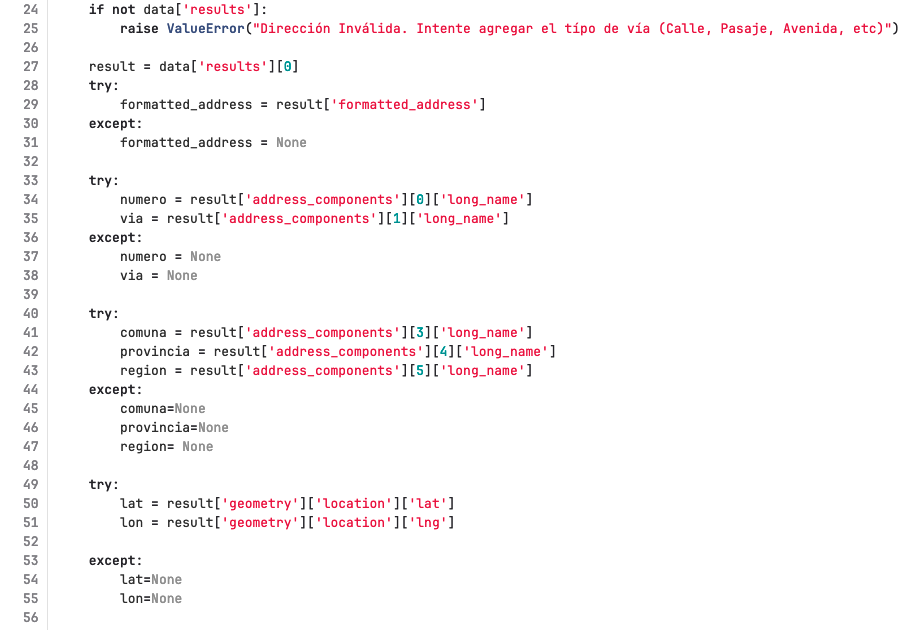



Finalmente la función retorna las distintas variables, las cuales son tratadas por otra función.

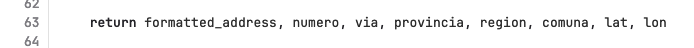

La función anterior es llamada por la función geocode(), que es la que manipula el input del usuario. La gente tiende a escribir el sector donde viven en el input, entonces se eliminan los sectores màs frecuentes antes de enviarlo a la api de geocoding.

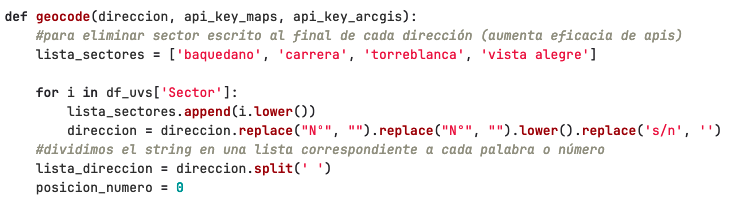





En el código anterior se realizó:
* Definición de funciones
* Definición de variables
* Indexing
* Uso de métodos
* Iteración con bucles for

Esto demuestra la gran versatilidad y facilidad de uso del lenguaje Python.